## Title - Paddy Disease Detection using CNN


In [ ]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing the dataset, checking the first 5 rows and the shape of the dataset
df_train = pd.read_csv("D:\\Rice Disease\\paddy-disease-classification\\train.csv")
df_train.head(), df_train.shape

(     image_id                  label variety  age
 0  100330.jpg  bacterial_leaf_blight   ADT45   45
 1  100365.jpg  bacterial_leaf_blight   ADT45   45
 2  100382.jpg  bacterial_leaf_blight   ADT45   45
 3  100632.jpg  bacterial_leaf_blight   ADT45   45
 4  101918.jpg  bacterial_leaf_blight   ADT45   45,
 (10407, 4))

In [6]:
# checking the unique values of label in the dataset
df_train['label'].unique()

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [7]:
# checking the unique values of variety in the dataset
df_train['variety'].unique()

array(['ADT45', 'IR20', 'KarnatakaPonni', 'Onthanel', 'Ponni', 'Surya',
       'Zonal', 'AndraPonni', 'AtchayaPonni', 'RR'], dtype=object)

In [8]:
# checking the unique values of variety in the dataset
df_train['variety'].unique()

array(['ADT45', 'IR20', 'KarnatakaPonni', 'Onthanel', 'Ponni', 'Surya',
       'Zonal', 'AndraPonni', 'AtchayaPonni', 'RR'], dtype=object)

In [9]:
# checking the count of each unique value of label in the dataset
df_train['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

In [10]:
# checking the count of each unique value of variety in the dataset
df_train['variety'].value_counts()

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

In [11]:
# let's check the statistical summary of the dataset
df_train.describe()

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


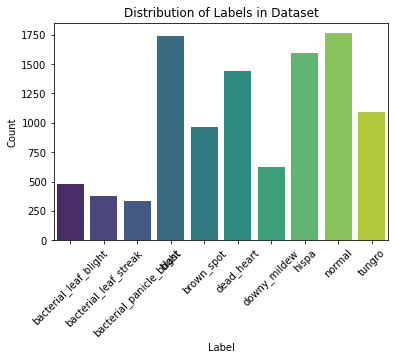

In [12]:
# Plot the count of each unique value in the 'label' column
sns.countplot(x=df_train['label'], hue=df_train['label'], palette='viridis', legend=False)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

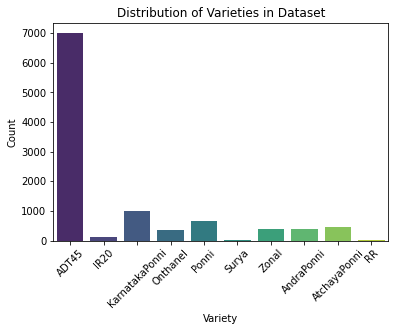

In [13]:
# Plot the count of each unique value in the 'variety' column
ax = sns.countplot(x=df_train['variety'], hue=df_train['variety'], palette='viridis', legend=False)

# Add labels and title
plt.xlabel("Variety")
plt.ylabel("Count")
plt.title("Distribution of Varieties in Dataset")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [14]:
# Lets Filter the label column based on Normal
normal=df_train[df_train['label']=='normal']
normal=normal[normal['variety']=='ADT45']
five_normal=normal.image_id[:5].values
five_normal.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [15]:
# encoding the label and variety columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_train['variety'] = label_encoder.fit_transform(df_train['variety'])

# checking the first 5 rows of the dataset
df_train.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


<Axes: >

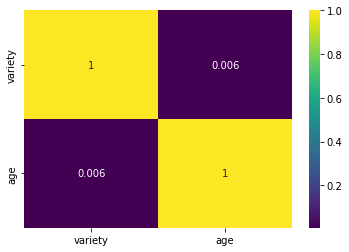

In [16]:
# Let's check the correlation of the features
sns.heatmap(df_train[['variety', 'age']].corr(), annot=True, cmap='viridis')


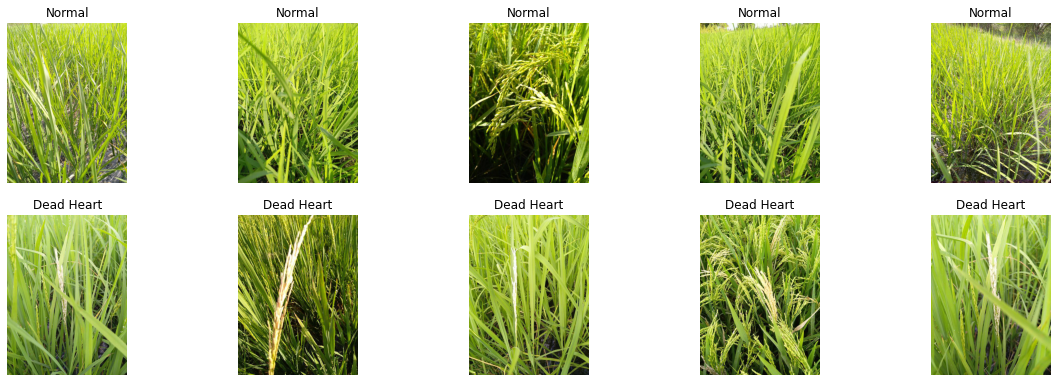

In [17]:
# let's have a look of images of the dataset

import os
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
path = r"D:/Rice Disease/paddy-disease-classification/train_images/"

# Get sample image filenames (Ensure these lists are correctly populated)
five_normal = os.listdir(os.path.join(path, "normal"))[:5]  # First 5 images from 'normal' folder
five_dead = os.listdir(os.path.join(path, "dead_heart"))[:5]  # First 5 images from 'dead_heart' folder

# Set up figure size
plt.figure(figsize=(20, 10))

columns = 5
for i, image_loc in enumerate(np.concatenate((five_normal, five_dead))):
    plt.subplot(10 // columns + 1, columns, i + 1)

    if i < 5:
        image = plt.imread(os.path.join(path, "normal", image_loc))
        plt.title("Normal")
    else:
        image = plt.imread(os.path.join(path, "dead_heart", image_loc))
        plt.title("Dead Heart")

    plt.imshow(image)
    plt.axis("off")  # Hide axes for better visualization

# Show the images
plt.show()


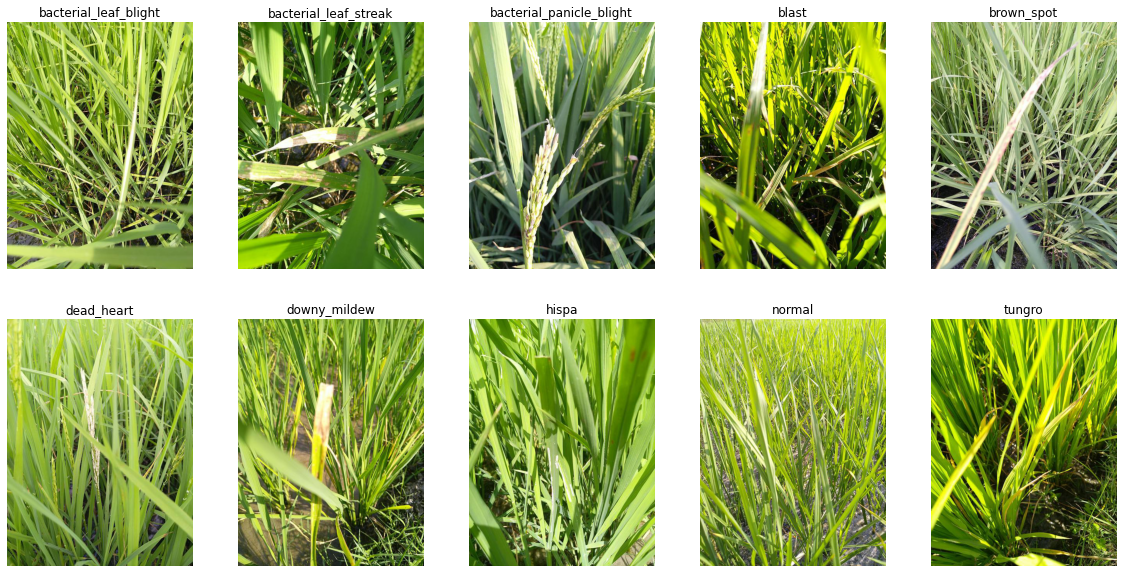

In [18]:
# images from the all labels in the dataset

import matplotlib.pyplot as plt

images = [
    r"D:\Rice Disease\paddy-disease-classification\train_images\bacterial_leaf_blight\100023.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\bacterial_leaf_streak\100042.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\bacterial_panicle_blight\100043.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\blast\100004.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\brown_spot\100001.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\dead_heart\100008.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\downy_mildew\100017.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\hispa\100003.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\normal\100002.jpg",
    r"D:\Rice Disease\paddy-disease-classification\train_images\tungro\100011.jpg"
]

diseases = [
    'bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 
    'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro'
]

# Create figure and axes for displaying images
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    img = plt.imread(images[i]) 
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(diseases[i])
    ax[i//5, i%5].axis('off')

# Show the images
plt.show()


In [19]:
# Defining the parameters
batch_size = 32
img_height = 180
img_width = 180

# Path to the dataset
path = r"D:\Rice Disease\paddy-disease-classification\train_images"


In [20]:
!pip install tensorflow


In [21]:
# creating the training dataset

import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    path, 
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path, 
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [23]:
# names of the classes
class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [24]:
# shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 180, 180, 3)
Shape of y_train:  (32,)


In [25]:
from tensorflow.keras.layers import Rescaling  # Correct import

# Normalization layer of the dataset
normalization_layer = Rescaling(1./255)


In [26]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lebles_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# shape of the images dataset
print("Minimum Value = ", np.min(first_image), "\nMaximum Value = ", np.max(first_image))

Minimum Value =  0.0 
Maximum Value =  1.0


In [27]:
#Auto-tuning
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
num_classes = len(class_names)
num_classes

10

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [30]:
# compiling the model
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
%%time
# early stopping
from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping

earlystopping = EarlyStopping(patience=3, restore_best_weights=True)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks=[earlystopping])

# evaluat the model
loss, accuracy = model.evaluate(val_ds)

Epoch 1/100


C:\Users\HP\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


261/261 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.2188 - loss: 2.1463 - val_accuracy: 0.4580 - val_loss: 1.5811
Epoch 2/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.4933 - loss: 1.4612 - val_accuracy: 0.6050 - val_loss: 1.1964
Epoch 3/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.6728 - loss: 0.9716 - val_accuracy: 0.6809 - val_loss: 1.0584
Epoch 4/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.7865 - loss: 0.6679 - val_accuracy: 0.7564 - val_loss: 0.9496
Epoch 5/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 234s 898ms/step - accuracy: 0.8525 - loss: 0.4641 - val_accuracy: 0.7905 - val_loss: 0.7992
Epoch 6/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 248s 951ms/step - accuracy: 0.8827 - loss: 0.3541 - val_accuracy: 0.7799 - val_loss: 0.8469
Epoch 7/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 245s 938ms/step - accuracy: 0.9213 - loss: 0.2410 - val_accuracy: 0.8438 - val_loss: 0.6806
Epoch 8/100
261/261 ━━━━━━━━━━━━━━━━━━━━ 250s 957ms/step - accuracy: 0.9505 - loss: 0.1471 - 

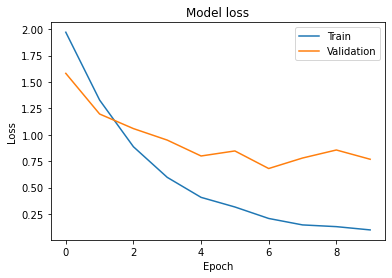

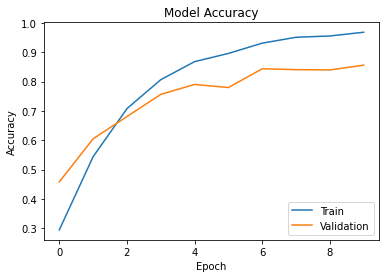

In [35]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [36]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\Rice Disease\paddy-disease-classification\test_images",  
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode=None,  # No labels since it's a test dataset
    shuffle=False 
)


Found 3469 files.


In [37]:
y_pred =  model.predict(test_ds)

109/109 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step


In [38]:
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes 

array([7, 8, 3, ..., 9, 1, 5])

In [39]:
submission_classes = [class_names[x] for x in y_pred_classes]

In [40]:
submit = pd.read_csv(r"D:\Rice Disease\paddy-disease-classification\sample_submission.csv")

In [41]:
submit['label'] = submission_classes[:len(submit)]
submit.to_csv('submission.csv', index=False)

In [42]:
print(submit.head())


     image_id   label
0  200001.jpg   hispa
1  200002.jpg  normal
2  200003.jpg   blast
3  200004.jpg   blast
4  200005.jpg   blast


## Observations:
- The dataset has 10,407 images for training and 3,469 images for testing.
- The dataset has 10 classes, 9 disease categories and 1 normal leaf.
- The dataset has 2 additional metadata columns, `Variety` and `Age`.
- The age of the paddy leaf is in days 45 to 82.
- The most of the images are of the ADT45 variety, and the least are of the Surya variety.
- The correlation between the age and the variety is very low.
- All the images are abosultely different from each other. 
- The dataset has 8326 images of the training set and 2081 images of the testing set.
- Accuracy of the model is 0.95 on the training set and 0.94 on the testing set.